#### Loading data


In [1]:
import pandas as pd
data = pd.read_csv('Data.csv')

#### Exploaring Data

In [2]:
data.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,56000,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    10 non-null     object
 1   Age        10 non-null     int64 
 2   Salary     10 non-null     int64 
 3   Purchased  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
data.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.800000,63000.000000
std,7.254118,11822.765234
min,27.000000,48000.000000
25%,35.500000,54500.000000
50%,38.500000,59500.000000
75%,43.000000,70750.000000
max,50.000000,83000.000000


In [5]:
data.shape

(10, 4)

In [6]:
data.groupby('Purchased').size()

Purchased
No     5
Yes    5
dtype: int64

In [7]:
data.groupby('Purchased').mean()

,Age,Salary
Purchased,,
No,40.2,64400.0
Yes,37.4,61600.0


#### Data Visualization

In [8]:
import seaborn as sns

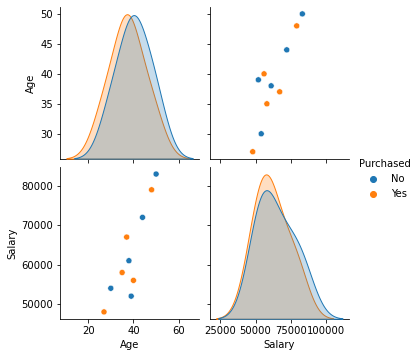

In [9]:
sns.pairplot(data,hue="Purchased")

#### Model construction and Evaluation

In [10]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
# Seperating the data into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
print(X)

[[1.0 0.0 0.0 44 72000]
 [0.0 0.0 1.0 27 48000]
 [0.0 1.0 0.0 30 54000]
 [0.0 0.0 1.0 38 61000]
 [0.0 1.0 0.0 40 56000]
 [1.0 0.0 0.0 35 58000]
 [0.0 0.0 1.0 39 52000]
 [1.0 0.0 0.0 48 79000]
 [0.0 1.0 0.0 50 83000]
 [1.0 0.0 0.0 37 67000]]


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_test)

[[-1.22474487  1.         -0.81649658 -2.33680854 -1.06455505]
 [-1.22474487  1.         -0.81649658  1.99061468  1.90391576]
 [-1.22474487  1.         -0.81649658 -0.17309693 -0.85983292]
 [ 0.81649658  0.         -0.81649658 -0.82221041  0.26613876]
 [-1.22474487  0.          1.22474487 -2.98592202 -1.67872142]]


In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         2
         Yes       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

[[2 0]
 [2 1]]


In [19]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.6


In [27]:
## Prediction for user input
c= input("Enter country: ")
a= input("Enter age: ")
s= input("Enter Salary: ")
def newPred(c,a,s):
    npArray=[[c,a,s,1,0]]
    print(npArray)
    npArray = np.array(ct.fit_transform(npArray))
    print(npArray)
    npArray = sc.transform(npArray)
    print(classifier.predict(npArray))
newPred(c,a,s)

Enter country:  nep
Enter age:  34
Enter Salary:  5674


[['nep', '34', '5674', 1, 0]]
[[1.0 '34' '5674' 1 0]]
['No']
